In [1]:
from framework import *
import nevis
from scipy.optimize import dual_annealing
import numpy as np
import matplotlib.pyplot as plt


f = nevis.linear_interpolant()
x_max, y_max = nevis.dimensions()


def run_dual_annealing(**kwargs):
    points = []
    function_values = []
    def wrapper(u):
        x, y = u
        points.append((x, y))
        z = f(x, y)
        function_values.append(z)
        return -z

    x_max, y_max = nevis.dimensions()
    ret = dual_annealing(
        wrapper, 
        bounds=[(0, x_max), (0, y_max)],
        maxfun=MAX_FES,
        **kwargs
    )

    return Result(
        ret.x,
        -ret.fun,
        points,
        ret.message,
        function_values,
        ret_obj=ret
    )

algo = Algorithm(
    'Dual Annealing', 
    run_dual_annealing,
    {
        # 'maxiter': np.arange(1500, 3000, 100),
        'maxiter': [2000],
        'initial_temp': np.linspace(2e4, 4e4, 1000),
        'restart_temp_ratio': np.logspace(-5, -3, 100),
        # 'visit': np.linspace(1 + EPS, 3, 1000),
        # 'accept': np.logspace(-5, -1e-4, 1000),
    },
    version=2
)
algo.tune_params(
    # metric='par2',
    # mode='min',
    metric='ert',
    mode='min'
)

# algo.plot_instances(
#     x_metric='success_rate',
#     y_metric='avg_height'
# )
# plt.show()


Calculating instance 1 / 50
ert = 105058.40000000002

Calculating instance 2 / 50
ert = inf

Calculating instance 3 / 50
ert = 205530.0

Calculating instance 4 / 50
ert = 706241.0

Calculating instance 5 / 50
ert = 738763.0

Calculating instance 6 / 50
ert = 709513.0

Calculating instance 7 / 50
ert = inf

Calculating instance 8 / 50
ert = inf

Calculating instance 9 / 50
ert = 206414.66666666666

Calculating instance 10 / 50
ert = inf

Calculating instance 11 / 50
ert = inf

Calculating instance 12 / 50
ert = 702680.0

Calculating instance 13 / 50
ert = 701070.0

Calculating instance 14 / 50
ert = 142706.50000000003

Calculating instance 15 / 50
ert = 330210.5

Calculating instance 16 / 50
ert = 214774.66666666666

Calculating instance 17 / 50
ert = 329668.0

Calculating instance 18 / 50
ert = 713815.0

Calculating instance 19 / 50
ert = inf

Calculating instance 20 / 50
ert = inf

Calculating instance 21 / 50
ert = 332654.0

Calculating instance 22 / 50
ert = 329205.0

Calculating in

In [2]:
algo_instance = algo.best_instance
print(algo_instance.success_metrics())
algo_instance.print()


{'success_rate': 0.3333333333333333, 'failure_rate': 0.6666666666666667, 'success_cnt': 5, 'avg_success_eval': 5058.4, 'hv': 14980.533333333333, 'performance': 15175.2, 'par2': 68352.8, 'par10': 335019.4666666667, 'avg_height': 1284.5769452039399, 'ert': 105058.40000000002}
{'algorithm_name': 'Dual Annealing',
 'algorithm_version': 2,
 'initial_temp': 37517.51751751752,
 'maxiter': 2000,
 'restart_temp_ratio': 9.326033468832199e-05}
=== Result #0 ===
11134
Congratulations!
You landed at an altitude of 1343m.
  https://opentopomap.org/#marker=15/56.796323/-5.004321
You are 75m from the nearest named hill top, "Ben Nevis",
  ranked the 1st heighest in GB.
  http://hillsummits.org.uk/htm_summit/278.htm

=== Result #1 ===
9034
Congratulations!
You landed at an altitude of 1147m.
  https://opentopomap.org/#marker=15/56.813535/-4.464956
You are 32m from the nearest named hill top, "Ben Alder",
  ranked the 43d heighest in GB.
  http://hillsummits.org.uk/htm_summit/345.htm

=== Result #2 ===


Length of function_values: 15
Length of distance_values: 15


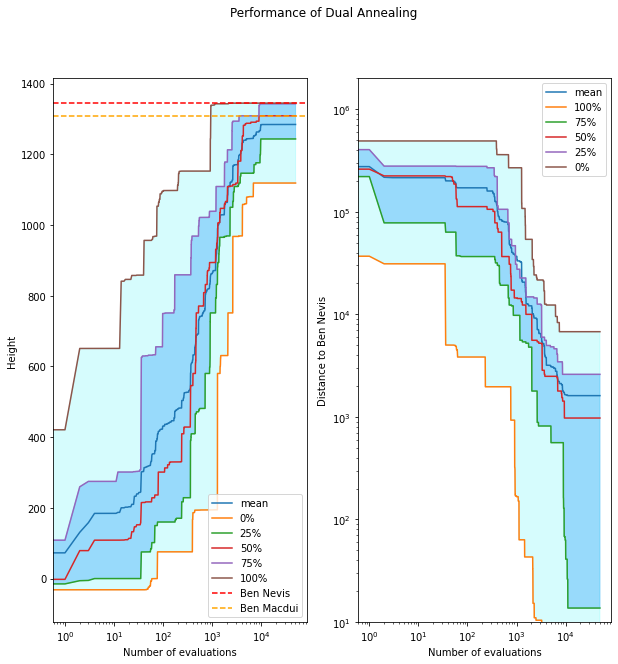

In [3]:
algo_instance.plot_convergence_graph()
plt.show()

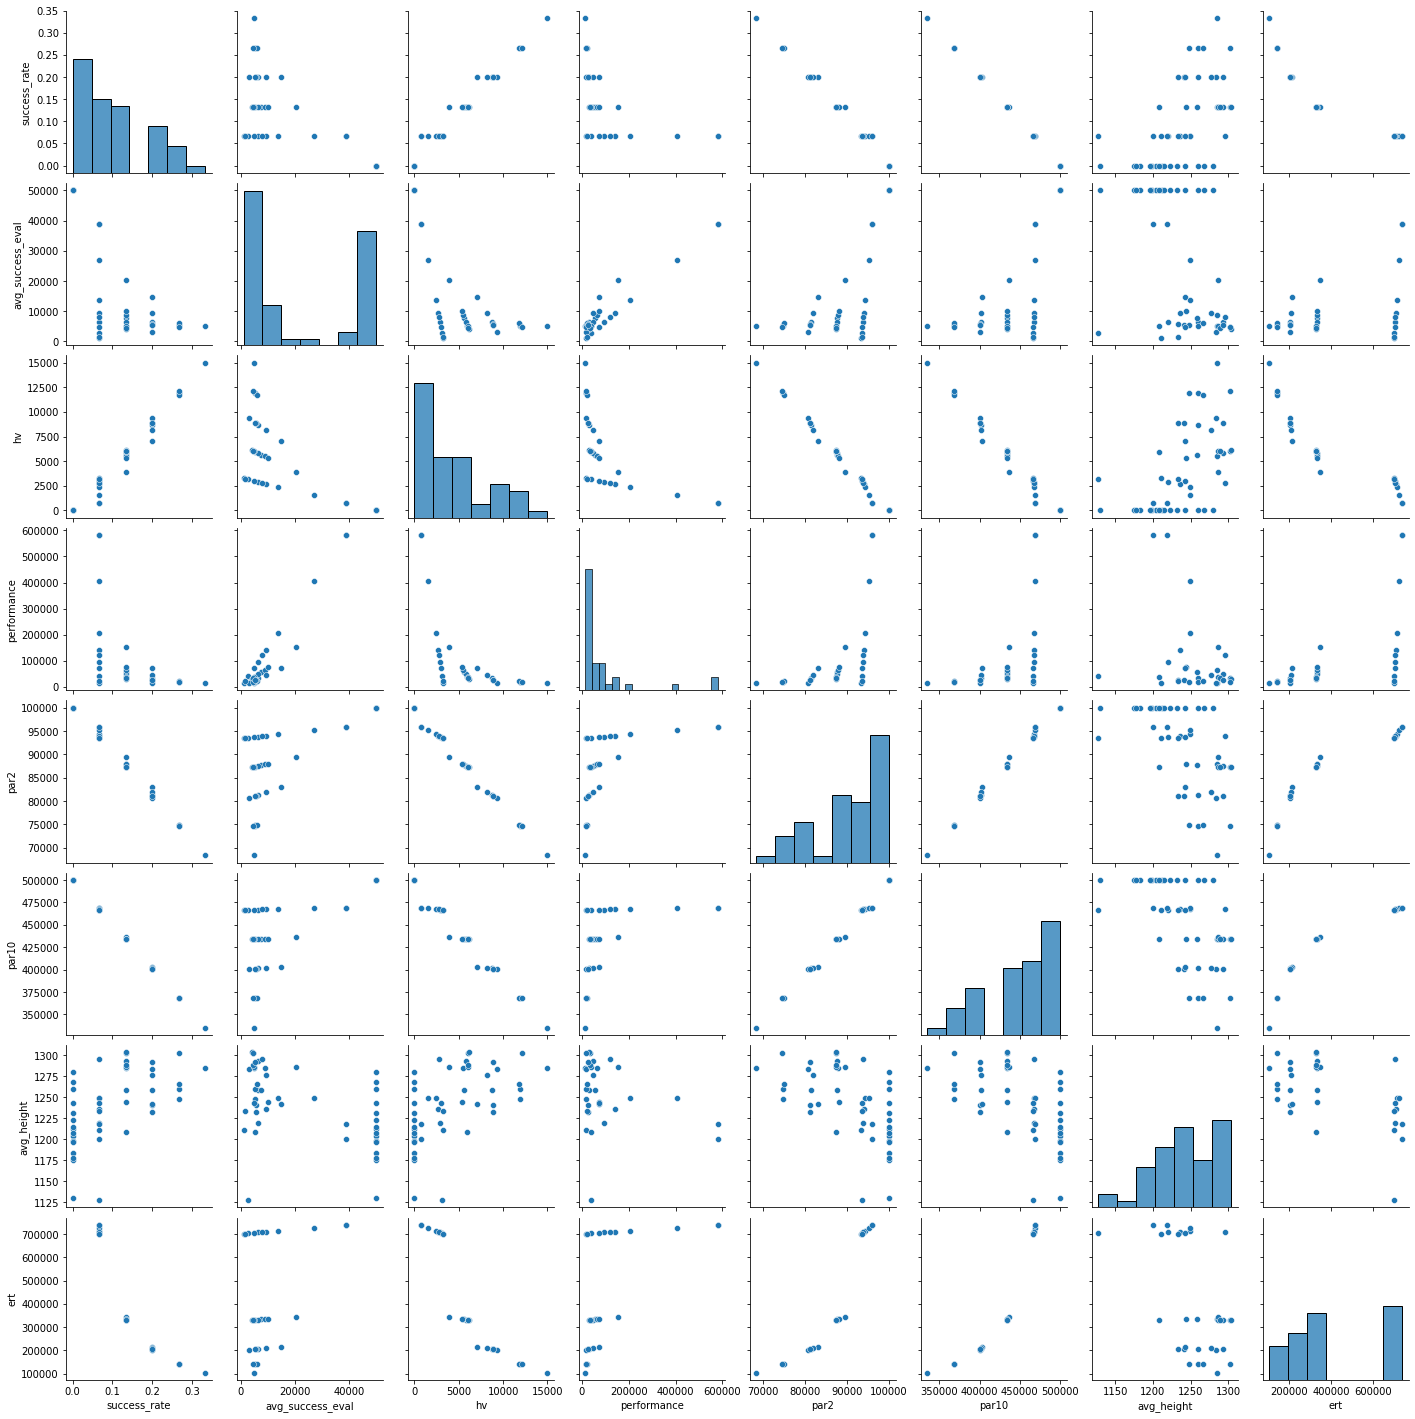

In [4]:
algo.plot_all()

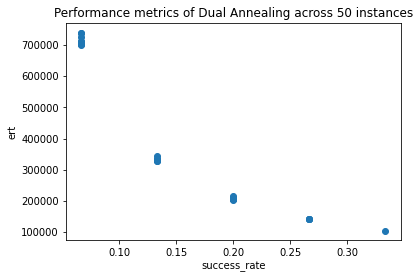

In [5]:
algo.plot_instances('success_rate', 'ert')

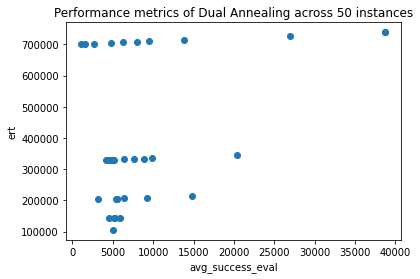

In [6]:
algo.plot_instances('avg_success_eval', 'ert')
